In [138]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from pathlib import Path
sns.set()
sns.set_palette('colorblind');

In [230]:
logfile = '/data/logs/bigmodelbiganew/biga_nolim_mlp_small/rep{}/logall_18999.txt'

In [231]:
i = 0
ok = True
logs = []
while ok:
    try:
        logs.append(pd.read_csv(logfile.format(i), delimiter="\t"))
    except:
        ok = False
    else:
        i += 1
log = pd.concat(logs)
    
log

,eval,iter,id,a,onOpp,nbOnOpp,curCoop,meanOwn,meanTotal
0,0,0,0,4.35218,0,0,0.000000,1.413240,3.310920
1,0,0,1,3.10628,0,0,0.000000,0.000000,0.000000
2,0,0,2,1.51269,0,0,0.000000,1.385170,1.595310
3,0,0,3,1.00182,0,0,0.000000,0.715640,3.376270
4,0,0,4,3.31158,0,0,0.000000,0.120215,1.515440
5,0,0,5,5.44706,0,0,0.000000,6.004160,6.901710
6,0,0,6,5.23120,0,0,0.000000,1.040010,1.333960
7,0,0,7,7.19620,0,0,0.000000,4.502860,19.072000
8,0,0,8,4.80364,0,0,0.000000,0.000000,0.000000
9,0,0,9,3.03531,0,0,0.000000,0.272725,1.235410


In [232]:
on_opp = log.query('onOpp == 1 and nbOnOpp >= 2')
on_opp.head(10)

,eval,iter,id,a,onOpp,nbOnOpp,curCoop,meanOwn,meanTotal
381,0,15,6,5.23120,1,2,2.596060,2.59606,7.89198
387,0,15,12,5.03919,1,2,5.295920,6.02552,6.35003
406,0,16,6,5.23120,1,2,0.404211,1.50014,4.57012
412,0,16,12,5.03919,1,2,0.844054,5.44980,5.78317
431,0,17,6,5.23120,1,2,0.748420,1.24956,3.56071
437,0,17,12,5.03919,1,2,0.793453,4.98417,5.35904
456,0,18,6,5.23120,1,2,0.748689,1.12435,3.04857
462,0,18,12,5.03919,1,2,0.763452,4.12110,4.57083
481,0,19,6,5.23120,1,2,0.729692,1.04541,2.73042
487,0,19,12,5.03919,1,2,0.728151,3.60434,4.12705


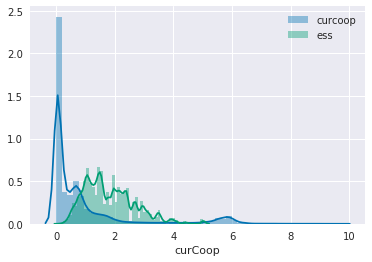

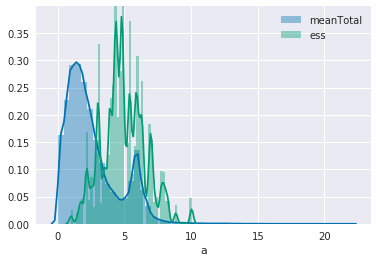

In [233]:
sns.distplot(on_opp['curCoop'], label="curcoop")
sns.distplot(on_opp['a']/on_opp['nbOnOpp'], label="ess")
plt.legend()
plt.figure()
sns.distplot(on_opp['meanTotal'], label="meanTotal")
sns.distplot(on_opp['a'], label="ess")
plt.legend();


In [226]:
print(scipy.stats.normaltest(on_opp['curCoop']))
print(scipy.stats.normaltest(on_opp['a']))

NormaltestResult(statistic=165885.80648216186, pvalue=0.0)
NormaltestResult(statistic=4681.176597707461, pvalue=0.0)


Not normal, so wilcoxon

In [227]:
scipy.stats.wilcoxon(on_opp['curCoop'], on_opp['a']/on_opp['nbOnOpp'])

WilcoxonResult(statistic=10471544667.0, pvalue=0.0)

In [228]:
on_opp['curCoop'].median(), (on_opp['a']/on_opp['nbOnOpp']).median()

(0.265543, 1.6114199999999999)

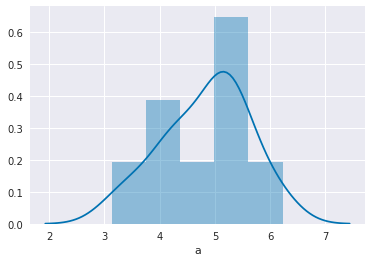

In [229]:
sns.distplot(log.groupby('id').mean()['a'])